# Coding The Perceptron

In [ ]:
import numpy as np

In [ ]:
# rgen has a lot of methods. One of them, which is the one we are using
# `normal`. Basicaly, it is a normal distribution that we can control and get
# random values from.
# We will use this to initialize our weights.

rgen = np.random.RandomState(10)
rgen.normal(loc = 0.0, scale = 0.001, size = 10)

In [ ]:
# this method is used to make a float?
b = np.float_(0.)
b

In [ ]:
# The zip() mehtod, in this sceneario is used to create a `coordinate point` if you will.
# As you can see it made a tuple of the corresponding indices of each array.

x = [1,2,3]
y = [4,5,6]

zipped = zip(x,y)

print("List:",list(zipped))

for x,y in zip(x,y):
    print(f"X: {x}")
    print(f"Y: {y} \n")

In [ ]:
# When dealing with numpy arrays, we can specify conditions where certain modifications can happen at these conditions.

a = np.arange(10)
np.where( a > 4, a*3, a)

In [142]:
# This class will act as our main perceptron to train.

class perceptron:
    
    def __init__( self, eta = 0.01, n_iter = 50, random_state = 1 ):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    # Y = W . X + B ( dot prod calc ) 
    def net_input( self, x ):
        return ( np.dot(self.w_ , x) + self.b_ )

    def predict( self, x ):
        return np.where(self.net_input(x) >= 0.0, 1, 0)
    
    # Derivative = 0
    def fit(self, x, y): 
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal( loc = 0.0, scale = 0.01, size = x.shape[1] )
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x,y):
                update = self.eta * ( target - self.predict(xi))
                self.w_ += update*xi
                self.b_ += update
                errors += (int)( update != 0.0 )
            self.errors_.append(errors)
        return self




# Downloading The Dataset.

In [ ]:
# Importing the dataset
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding="utf-8")

In [ ]:
df.head()

[]

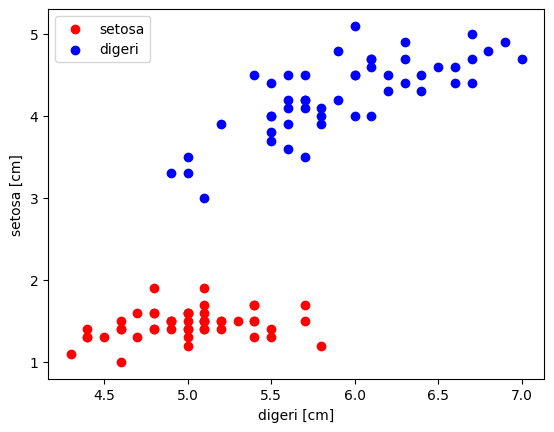

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# This .iloc function gives us the ability to visualize data based on rows and coloumns we choose.
y = df.iloc[0:100, 4].values
y = np.where( y == "Iris-setosa", 0, 1)
x = df.iloc[0:100, [0,2]].values

# plot configs.
plt.scatter( x[0:50, 0], x[0:50, 1] , marker = 'o', color = 'r', label = "setosa" )
plt.scatter( x[50:100, 0], x[50:100, 1] , marker = 'o', color = 'b', label = "digeri" )
plt.xlabel('digeri [cm]')
plt.ylabel('setosa [cm]')
plt.legend(loc="upper left")
plt.plot()

# Training.

In [166]:
ppn = perceptron( eta = 0.1, n_iter = 10 )

In [167]:
ppn.fit(x,y)

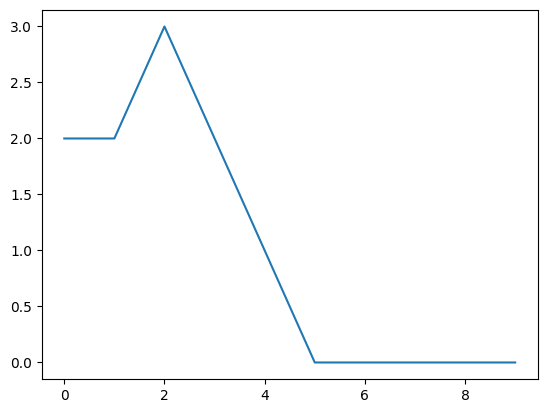

In [168]:
plt.plot( range( 0, len(ppn.errors_) ) , ppn.errors_)

In [216]:
b = 0
x[ b == 0, 1]

array([[4.9, 1.4]])

In [205]:
a = x[ y == cl[1], 1]
a

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

In [244]:
x1_min, x1_max = ( x[:, 0].min() - 1 ), ( x[:, 0].max() + 1 )
x2_min, x2_max = ( x[:, 1].min() - 1 ), ( x[:, 1].max() + 1 )

xx1, xx2 = np.meshgrid( np.arange( x1_min, x1_max, 0.2 ), np.arange( x2_min, x2_max, 0.2 ))

perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]))

# lab = perceptron.predict( np.array([xx1.ravel(), xx2.ravel()]).T )
# lab = lab.reshape(xx1.shape)

TypeError: perceptron.predict() missing 1 required positional argument: 'x'

# Plotting.

In [231]:
from matplotlib.colors import ListedColormap

def plot_decision_regions( X, y, classifier, resolution = 0.02 ):
    
    markers = ( 'o', 's', '<', '>', 'v' )
    colors = ( "red", "blue", "green", "lightgray", "cyan" )
    cmap = ListedColormap( colors[:len( np.unique(y)) ] )

    x1_min, x1_max = ( X[:, 0].min() - 1 ), ( X[:, 0].max() + 1 )
    x2_min, x2_max = ( X[:, 1].min() - 1 ), ( X[:, 1].max() + 1 )

    xx1, xx2 = np.meshgrid( np.arange( x1_min, x1_max, resolution ), np.arange( x2_min, x2_max, resolution )) 
    lab = classifier.predict( np.array([xx1.ravel(), xx2.ravel()]).T )
    lab = lab.reshape(xx1.shape)

    plt.contourf( xx1, xx2, lab, alpha = 0.3, cmap = cmap )
    plt.xlim( xx1.min(), xx1.max() )
    plt.ylim( xx2.min(), xx2.max() )

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter( x = X[ y == cl, 1],
                     y = X[ y == cl, 0],
                    alpha = 0.8,
                    color = colors[idx],
                    marker = markers[idx], )

In [232]:
plot_decision_regions( x, y, perceptron)

TypeError: perceptron.net_input() missing 1 required positional argument: 'x'